In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [6]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
#import jovian
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split


%matplotlib inline

In [3]:
# load dataset

df = pd.read_csv('wine.csv')

In [4]:
df

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [7]:
'''
We will be analyzing the dataset by using Linear Regression with the pytorch module
Simple linear regression is an approach for predicting a response using a single 
feature. It is assumed that the two variables are linearly related.
'''


'\nWe will be analyzing the dataset by using Linear Regression with the pytorch module\nSimple linear regression is an approach for predicting a response using a single \nfeature. It is assumed that the two variables are linearly related.\n'

In [25]:
input_cols = list(df.columns)[1:-1]
output_cols = ['quality']
input_cols, output_cols

# X = df.iloc[:,:-1].values # features
# Y = df.iloc[:,-1].values # dependent variable
# X, Y

(['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol'],
 ['quality'])

In [28]:
def df_to_arrays(df):
    df1 = df.copy(deep=True)
    inputs_array = df1[input_cols].to_numpy()
    targets_array = df1[output_cols].to_numpy()
    return inputs_array, targets_array

In [29]:
inputs_array, targets_array = df_to_arrays(df)
inputs_array, targets_array

(array([[ 7.4 ,  0.7 ,  0.  , ...,  3.51,  0.56,  9.4 ],
        [ 7.8 ,  0.88,  0.  , ...,  3.2 ,  0.68,  9.8 ],
        [ 7.8 ,  0.76,  0.04, ...,  3.26,  0.65,  9.8 ],
        ...,
        [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
        [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
        [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]]),
 array([[5],
        [5],
        [5],
        ...,
        [6],
        [7],
        [6]], dtype=int64))

In [30]:
inputs = torch.from_numpy(inputs_array).type(torch.float)
targets = torch.from_numpy(targets_array).type(torch.float)
inputs, targets

(tensor([[ 7.4000,  0.7000,  0.0000,  ...,  3.5100,  0.5600,  9.4000],
         [ 7.8000,  0.8800,  0.0000,  ...,  3.2000,  0.6800,  9.8000],
         [ 7.8000,  0.7600,  0.0400,  ...,  3.2600,  0.6500,  9.8000],
         ...,
         [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
         [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]),
 tensor([[5.],
         [5.],
         [5.],
         ...,
         [6.],
         [7.],
         [6.]]))

In [31]:
print('Shape of input tensor and target tensor::  ',inputs.shape, targets.shape)
print('datatype of input tensor and target tensor::  ',inputs.dtype, targets.dtype)

Shape of input tensor and target tensor::   torch.Size([6497, 11]) torch.Size([6497, 1])
datatype of input tensor and target tensor::   torch.float32 torch.float32


In [32]:
dataset = TensorDataset(inputs, targets)
dataset

In [33]:
train_ds, val_ds = random_split(dataset, [5200, 1297])
batch_size = 200
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [35]:
for xb, yb in train_loader:
    print('inputs:', xb)
    print('targets:', yb)
    break

inputs: tensor([[ 6.3000,  0.3400,  0.2800,  ...,  3.2300,  0.4600,  9.5000],
        [ 6.8000,  0.4100,  0.3100,  ...,  3.3800,  0.6400, 10.1000],
        [ 6.7000,  0.1800,  0.3000,  ...,  3.2900,  0.5200, 10.0000],
        ...,
        [ 4.8000,  0.3300,  0.0000,  ...,  3.3500,  0.6100,  9.9000],
        [ 6.0000,  0.5000,  0.0000,  ...,  3.3600,  0.4500,  9.5000],
        [ 6.6000,  0.4000,  0.3000,  ...,  3.3600,  0.7300, 12.6000]])
targets: tensor([[5.],
        [6.],
        [5.],
        [5.],
        [6.],
        [6.],
        [5.],
        [6.],
        [6.],
        [5.],
        [5.],
        [5.],
        [6.],
        [5.],
        [6.],
        [5.],
        [8.],
        [6.],
        [6.],
        [3.],
        [6.],
        [5.],
        [5.],
        [5.],
        [6.],
        [6.],
        [7.],
        [6.],
        [6.],
        [5.],
        [6.],
        [5.],
        [6.],
        [7.],
        [5.],
        [6.],
        [5.],
        [5.],
        [4.],
   

In [36]:
print(xb.dtype, yb.dtype)

torch.float32 torch.float32


In [34]:
input_size = len(input_cols)
output_size = len(output_cols)
input_size, output_size

(11, 1)

In [37]:
class WineQuality(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, xb):
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch
        out = self(inputs)
        loss = F.l1_loss(out, targets)
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        out = self(inputs)
        loss = F.l1_loss(out, targets)
        return {'val_loss': loss.detach()}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        if (epoch+1) % 100 == 0 or epoch == num_epochs-1:
            print('Epoch [{}], val_loss: {:.4f}'.format(epoch+1, result['val_loss']))

In [38]:
model = WineQuality()

In [39]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [40]:
epochs = 6000
lr = 1e-6
history5 = fit(epochs, lr, model, train_loader, val_loader)

C:\Users\ACER\miniconda3\envs\pytorch\lib\site-packages\torch\autograd\__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


Epoch [100], val_loss: 3.0075
Epoch [200], val_loss: 2.8788
Epoch [300], val_loss: 2.7561
Epoch [400], val_loss: 2.6336
Epoch [500], val_loss: 2.5185
Epoch [600], val_loss: 2.4081
Epoch [700], val_loss: 2.3009
Epoch [800], val_loss: 2.1987
Epoch [900], val_loss: 2.0994
Epoch [1000], val_loss: 2.0046
Epoch [1100], val_loss: 1.9131
Epoch [1200], val_loss: 1.8265
Epoch [1300], val_loss: 1.7434
Epoch [1400], val_loss: 1.6665
Epoch [1500], val_loss: 1.5912
Epoch [1600], val_loss: 1.5191
Epoch [1700], val_loss: 1.4508
Epoch [1800], val_loss: 1.3858
Epoch [1900], val_loss: 1.3238
Epoch [2000], val_loss: 1.2650
Epoch [2100], val_loss: 1.2092
Epoch [2200], val_loss: 1.1559
Epoch [2300], val_loss: 1.1068
Epoch [2400], val_loss: 1.0602
Epoch [2500], val_loss: 1.0159
Epoch [2600], val_loss: 0.9741
Epoch [2700], val_loss: 0.9343
Epoch [2800], val_loss: 0.8974
Epoch [2900], val_loss: 0.8631
Epoch [3000], val_loss: 0.8312
Epoch [3100], val_loss: 0.8021
Epoch [3200], val_loss: 0.7757
Epoch [3300], val

In [42]:
'''
Using linear regression with the pytorch module we are able to improve our score
from 30% with linear regression with the sklearn module to 60%.
It is still not great. Perhaps the data is not linearly related enough to make good
predictions.
'''

result = evaluate(model, val_loader)
print(result)

{'val_loss': 0.6085487604141235}


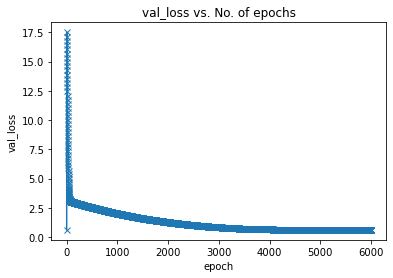

In [43]:
plt.title('val_loss vs. No. of epochs');
loss_mat = [res['val_loss'] for res in [result] + history5]
plt.plot(loss_mat, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')

val_loss = loss_mat[-1]

In [44]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)
    prediction = predictions[0].detach()
    print('Input:', input)
    print('Target:', target)
    print('Prediction', prediction)

In [50]:
input, target = val_ds[150]
predict_single(input, target, model)

Input: tensor([7.9000e+00, 4.4000e-01, 2.6000e-01, 4.4500e+00, 3.3000e-02, 2.3000e+01,
        1.0000e+02, 9.9117e-01, 3.1700e+00, 5.2000e-01, 1.2700e+01])
Target: tensor([6.])
Prediction tensor([6.8766])
